In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

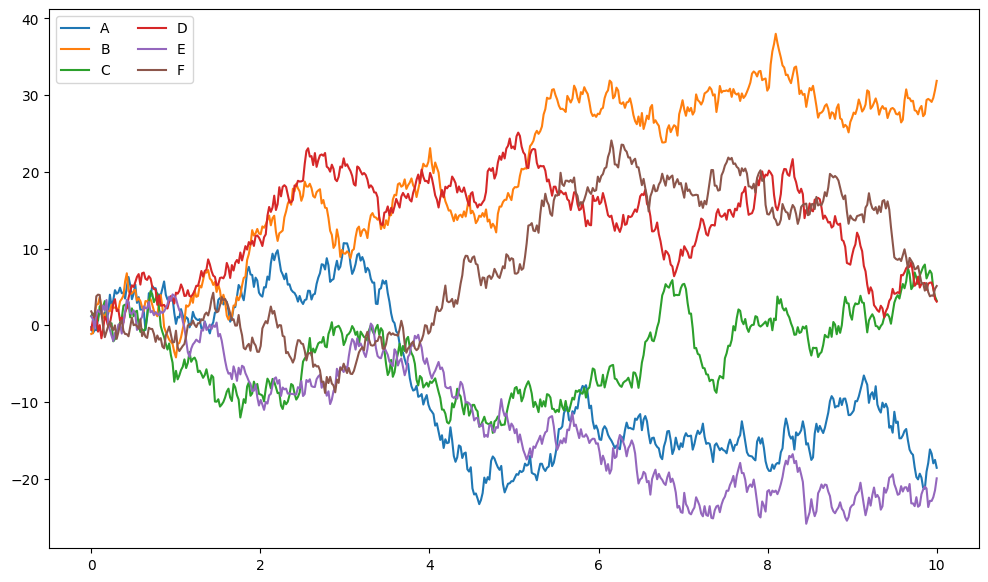

In [4]:
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

In [5]:
import requests
import pandas as pd

In [6]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [7]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2023-01-15 18:00:12.541807')

In [8]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [9]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

bitcoin

In [10]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-01-15 19:00:00,20923,20925,20677,20819,122.997882,2.558708e+06
2023-01-15 20:00:00,20821,20900,20781,20873,70.439241,1.469430e+06
2023-01-15 21:00:00,20880,20926,20844,20904,75.305829,1.572278e+06
2023-01-15 22:00:00,20902,20931,20873,20905,14.647872,3.063508e+05
2023-01-15 23:00:00,20904,20953,20765,20925,59.006040,1.230924e+06


<AxesSubplot: xlabel='CloseTime'>

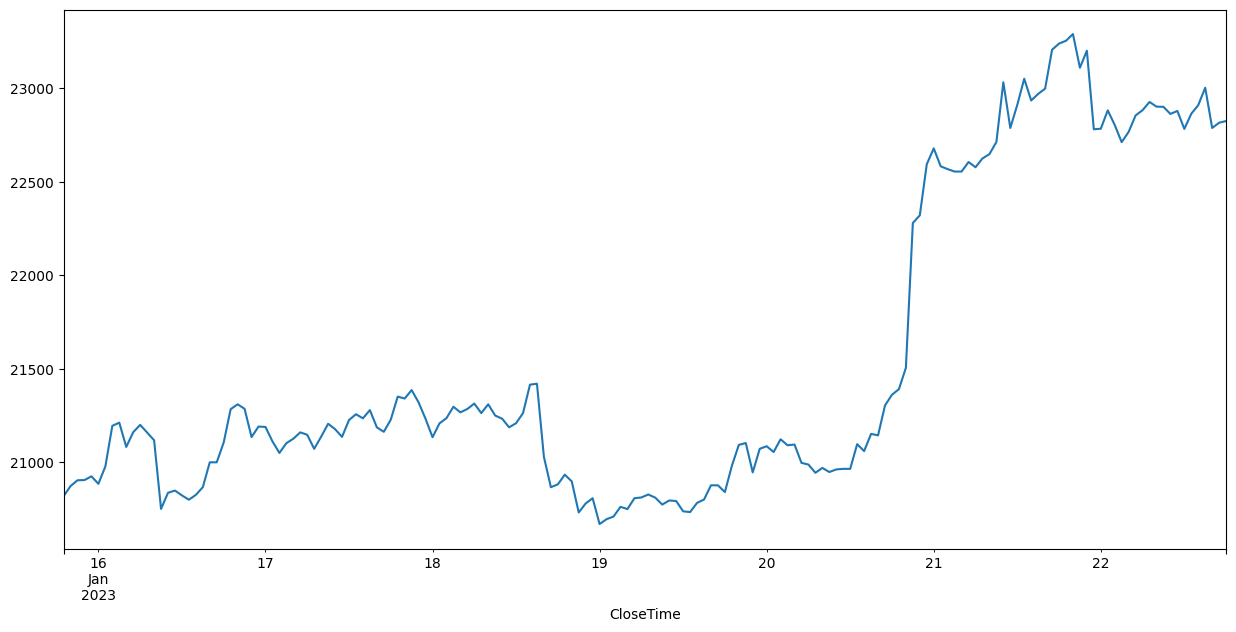

In [11]:
btc['ClosePrice'].plot(figsize=(15, 7))

Ether:

In [12]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-01-15 19:00:00,1552.2,1552.2,1534.4,1548.6,212.853736,328794.925947
2023-01-15 20:00:00,1545.9,1557.1,1542.7,1550.9,70.478141,109376.857595
2023-01-15 21:00:00,1551.7,1554.5,1546.6,1554.4,96.719330,150016.130681
2023-01-15 22:00:00,1554.3,1554.3,1550.0,1552.5,167.986669,260673.884934
2023-01-15 23:00:00,1552.5,1560.1,1542.9,1555.8,366.637201,567725.467620


<AxesSubplot: xlabel='CloseTime'>

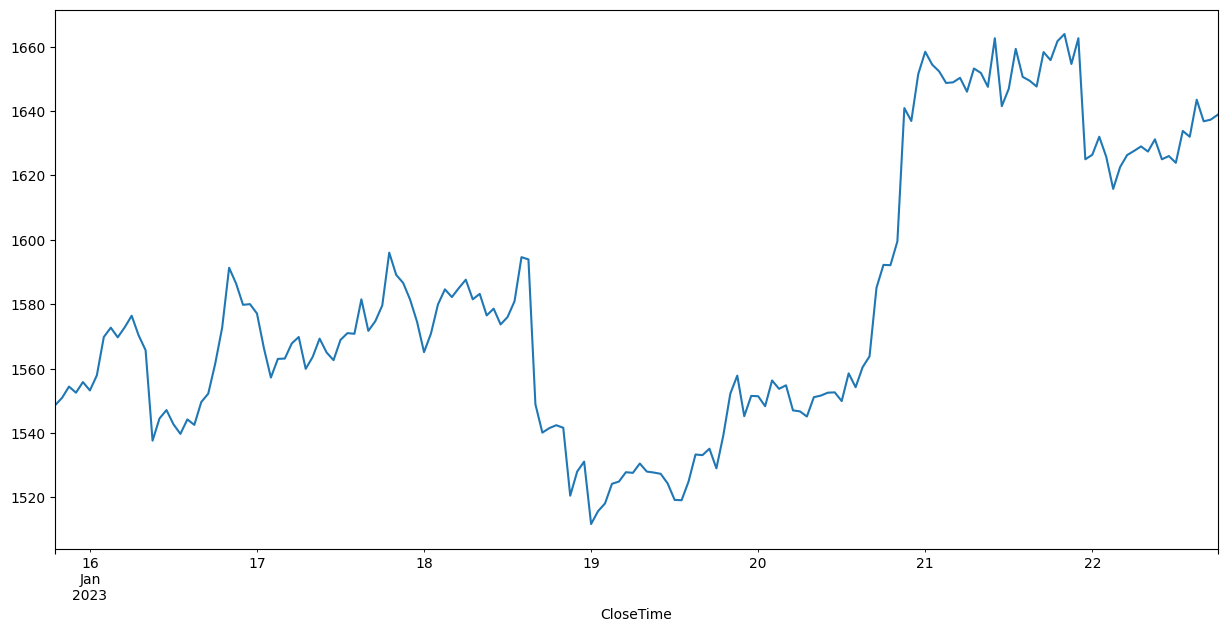

In [13]:
eth['ClosePrice'].plot(figsize=(15, 7))

In [14]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-01-15 19:00:00,1552.2,1552.2,1534.4,1548.6,212.853736,328794.925947
2023-01-15 20:00:00,1545.9,1557.1,1542.7,1550.9,70.478141,109376.857595
2023-01-15 21:00:00,1551.7,1554.5,1546.6,1554.4,96.719330,150016.130681
2023-01-15 22:00:00,1554.3,1554.3,1550.0,1552.5,167.986669,260673.884934
2023-01-15 23:00:00,1552.5,1560.1,1542.9,1555.8,366.637201,567725.467620


Bokeh

In [15]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [16]:
output_notebook()

Loading BokehJS ...

In [17]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend_label='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

In [18]:
writer = pd.ExcelWriter(r'D:\freecodecamp\data\cryptos.xlsx')

In [45]:

btc.to_excel(writer, sheet_name='Bitcoin')
btc.to_csv("btc.csv")

In [40]:
eth.to_excel(writer, sheet_name='Ether')

In [43]:
writer.close()

ValueError: I/O operation on closed file

In [22]:
v =np.arange(5)
v

array([0, 1, 2, 3, 4])

In [23]:
s=np.array([3,5,7,8,9])
s

array([3, 5, 7, 8, 9])

In [24]:
s+ v

array([ 3,  6,  9, 11, 13])

In [25]:
q =np.arange(4)
q

array([0, 1, 2, 3])

In [26]:
q[[0,-1]]

array([0, 3])

In [27]:
q[[True ,True ,False ,True]]

array([0, 1, 3])

In [28]:
q>=2

array([False, False,  True,  True])

In [29]:
q[q >= 2]

array([2, 3])

In [30]:
q.mean()

1.5

In [31]:
q[q > q.mean()]

array([2, 3])

In [32]:
q[~(q > q.mean())]

array([0, 1])

In [33]:
J = np.random.randint(100, size=(3, 3))
J

array([[61, 54, 38],
       [81, 85, 29],
       [94,  3, 10]])

In [34]:
J[np.array([
    [True, False, True],
    [False, True, False],
    [True, False, True]
])]

array([61, 38, 85, 94, 10])

In [35]:
J>30

array([[ True,  True,  True],
       [ True,  True, False],
       [ True, False, False]])

In [36]:
J+ 2

array([[63, 56, 40],
       [83, 87, 31],
       [96,  5, 12]])

In [37]:
a = np.arange(5)
a + 20

array([20, 21, 22, 23, 24])